In [55]:
import pandas as pd #data preprocessing
import itertools # confusion matrix
import string
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', None)

In [143]:
df = pd.read_csv('drugsComTest_raw.tsv', sep = '\t')
df.head(20)
df.shape

(53766, 7)

In [144]:
df.condition.value_counts()

Birth Control                                                     9648
Depression                                                        3095
Pain                                                              2100
Anxiety                                                           1908
Acne                                                              1847
Bipolar Disorde                                                   1380
Weight Loss                                                       1248
Insomnia                                                          1231
Obesity                                                           1189
ADHD                                                              1126
Emergency Contraception                                            827
Vaginal Yeast Infection                                            811
Diabetes, Type 2                                                   808
High Blood Pressure                                                783
Smokin

In [58]:
df_train = df[(df['condition'] == 'Birth Control')|(df['condition'] == 'Depression')|(df['condition'] == 'High Blood Pressure')|(df['condition'] == 'Diabetes, Type 2')]
df_train.head(5)

Unnamed: 0           drugName      condition  \
0       163740        Mirtazapine     Depression   
4        97768    Cyclafem 1 / 35  Birth Control   
6       215892             Copper  Birth Control   
9        71428             Levora  Birth Control   
30       79865  Blisovi Fe 1 / 20  Birth Control   

                                               review  rating  \
0   "I&#039;ve tried a few antidepressants over th...    10.0   
4   "I have been on this birth control for one cyc...     9.0   
6   "I&#039;ve had the copper coil for about 3 mon...     6.0   
9   "I was on this pill for almost two years. It d...     2.0   
30  "I absolutely love this product and recommend ...    10.0   

                 date  usefulCount  
0   February 28, 2012           22  
4    October 22, 2015            4  
6        June 6, 2016            1  
9      April 16, 2011            3  
30   November 3, 2017            4

In [59]:
df_train.shape

(14334, 7)

In [60]:
df_train.columns

Index(['Unnamed: 0', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')

In [61]:
X = df_train.drop(['Unnamed: 0', 'drugName', 'rating','date','usefulCount'], axis =1 )
X.head(20)

condition                                             review
0         Depression  "I&#039;ve tried a few antidepressants over th...
4      Birth Control  "I have been on this birth control for one cyc...
6      Birth Control  "I&#039;ve had the copper coil for about 3 mon...
9      Birth Control  "I was on this pill for almost two years. It d...
30     Birth Control  "I absolutely love this product and recommend ...
35  Diabetes, Type 2  "Have been on Actos for almost a year, gained ...
37     Birth Control  "I was on this for 5 years (and birth control ...
38        Depression  "I am a 22 year old female college student. I ...
43     Birth Control  "I&#039;m absolutely DONE taking this horrible...
45     Birth Control  "I started on the oral contraceptive pill but ...
46     Birth Control  "About two months ago I had to switch from LoL...
50     Birth Control  "I&#039;ve had this birth control for a year n...
53     Birth Control  "So I first got the nexplanon in July of 2014,...
54     Birth Control  "I started off by taking regular Ortho Tri Cyc...
61     Birth Control  "honestly the measurement hurt more than the a...
67        Depression  "Zoloft did not help me at all.  I was on it f...
70     Birth Control  "I was started on Gildess 1/20 but then was sw...
73        Depression  "Sadly only lasted 5 days on Effexor XR. The s...
74     Birth Control  "I had paragard for a year and a half and had ...
76     Birth Control  "I just started taking this birth control abou...

In [62]:
X.condition.value_counts()

Birth Control          9648
Depression             3095
Diabetes, Type 2        808
High Blood Pressure     783
Name: condition, dtype: int64

In [63]:
X.head()

condition                                             review
0      Depression  "I&#039;ve tried a few antidepressants over th...
4   Birth Control  "I have been on this birth control for one cyc...
6   Birth Control  "I&#039;ve had the copper coil for about 3 mon...
9   Birth Control  "I was on this pill for almost two years. It d...
30  Birth Control  "I absolutely love this product and recommend ...

In [64]:
#Separating the data

X_birth = X[(X['condition'] == 'Birth Control')]
X_dep = X[(X['condition'] == 'Depression')]
X_bp = X[(X['condition'] == 'High Blood Pressure')]
X_db= X[(X['condition'] == 'Diabetes, Type 2')]

In [65]:
! pip install wordcloud
from wordcloud import wordcloud


Text(0.5, 1.0, 'Word Cloud for Birth Control')

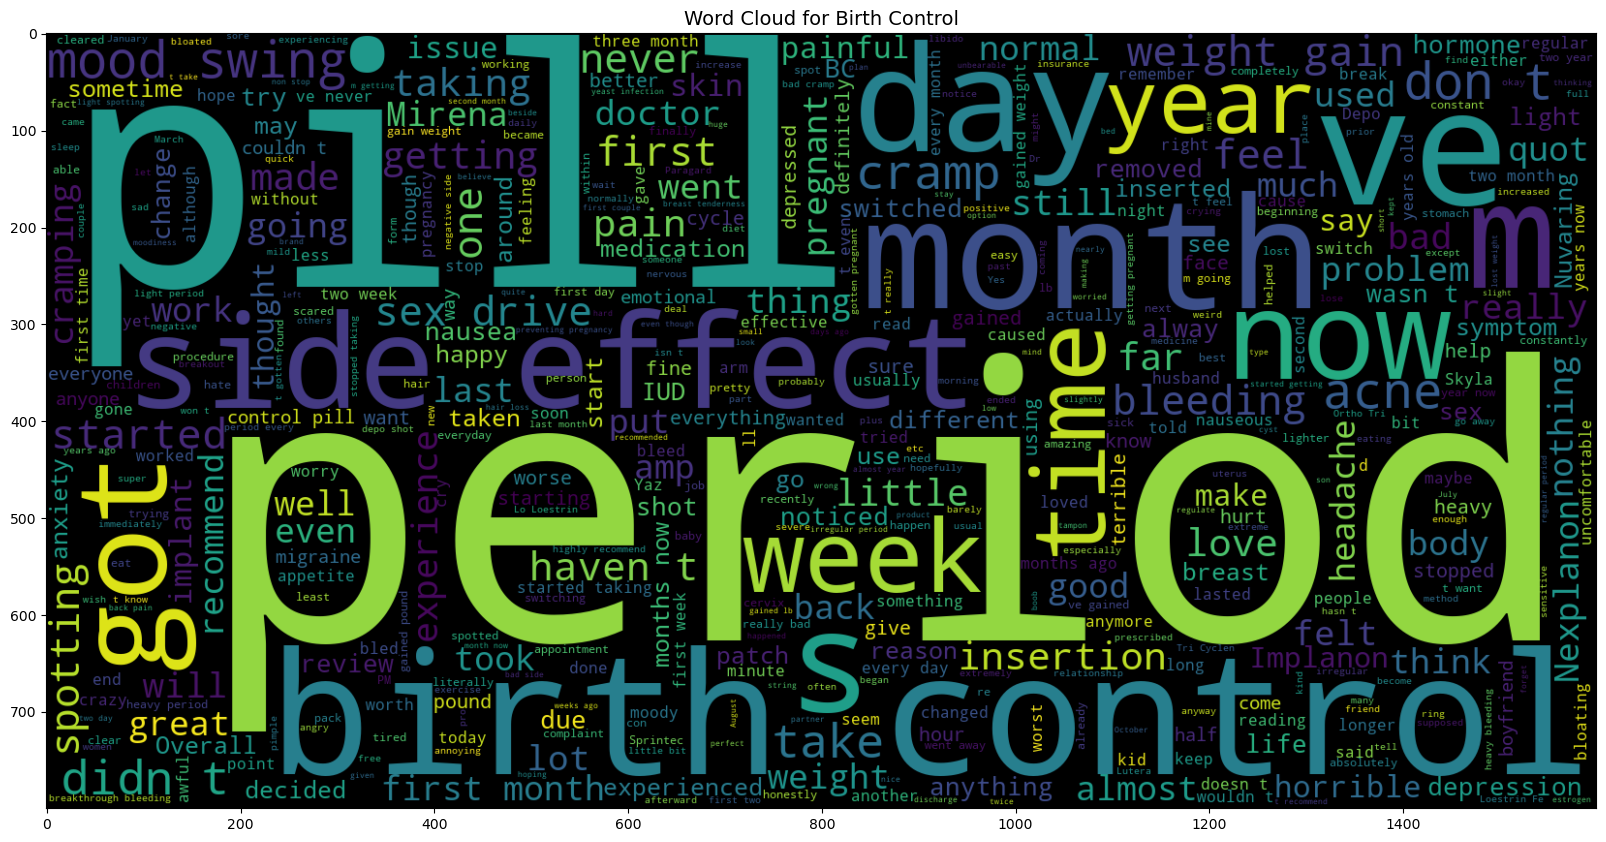

In [66]:
from wordcloud import WordCloud
plt.figure(figsize= (20,20)) #Text that is Fake News Headlines
wc = WordCloud(max_words= 500, width = 1600, height = 800).generate(" ".join(X_birth.review))
plt.imshow(wc, interpolation='bilinear')
plt.title('Word Cloud for Birth Control', fontsize = 14)

Text(0.5, 1.0, 'Word Cloud for Depression')

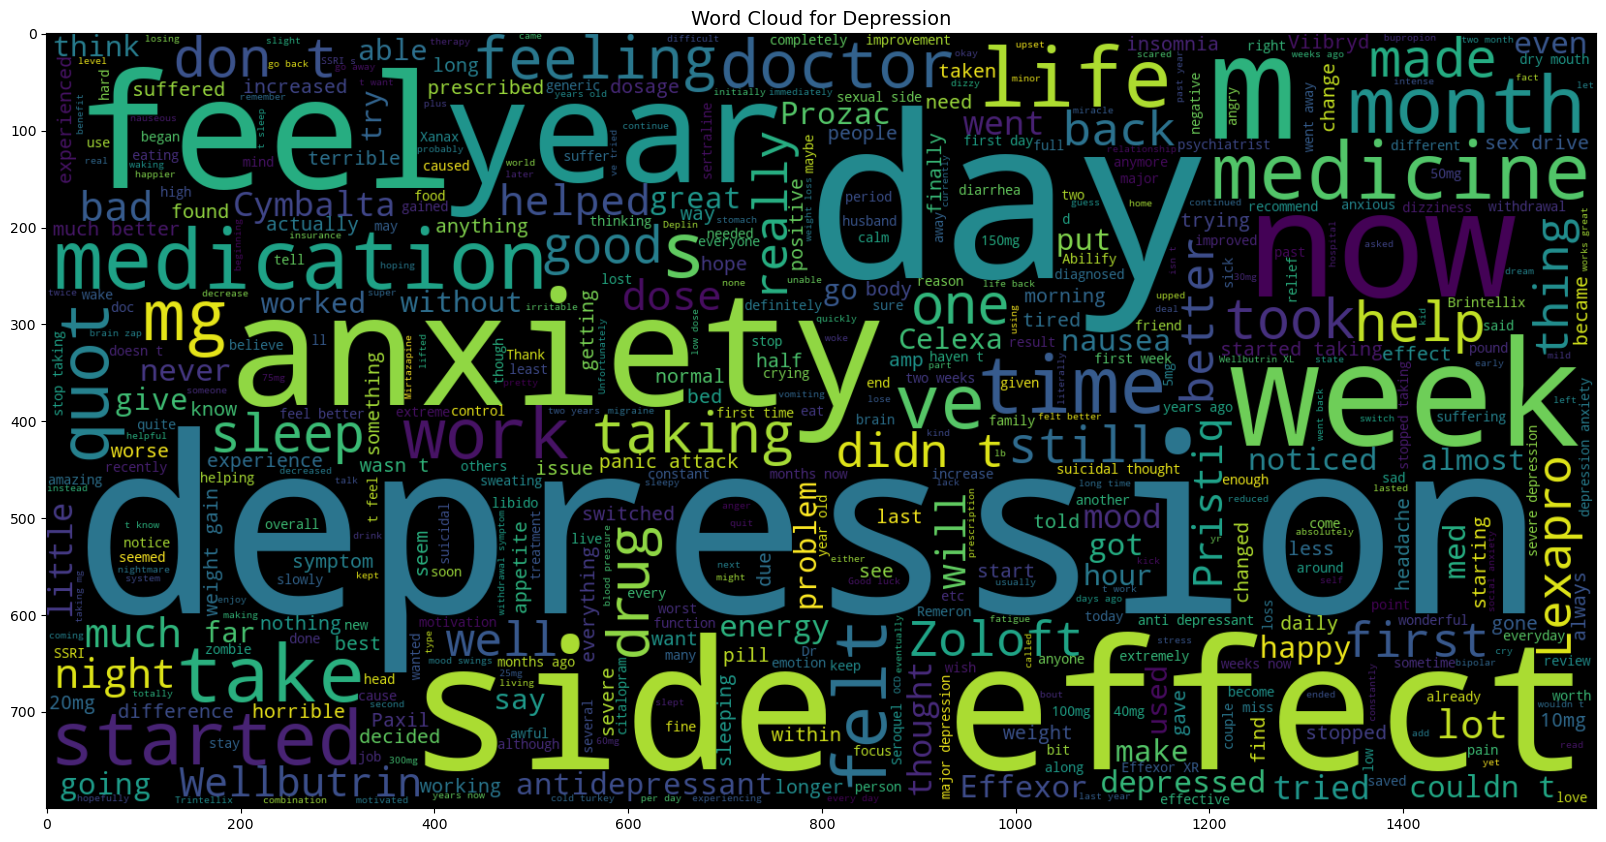

In [67]:

plt.figure(figsize= (20,20)) #Text that is Fake News Headlines
wc = WordCloud(max_words= 500, width = 1600, height = 800).generate(" ".join(X_dep.review))
plt.imshow(wc, interpolation='bilinear')
plt.title('Word Cloud for Depression', fontsize = 14)

Text(0.5, 1.0, 'Word Cloud for Blood Pressure')

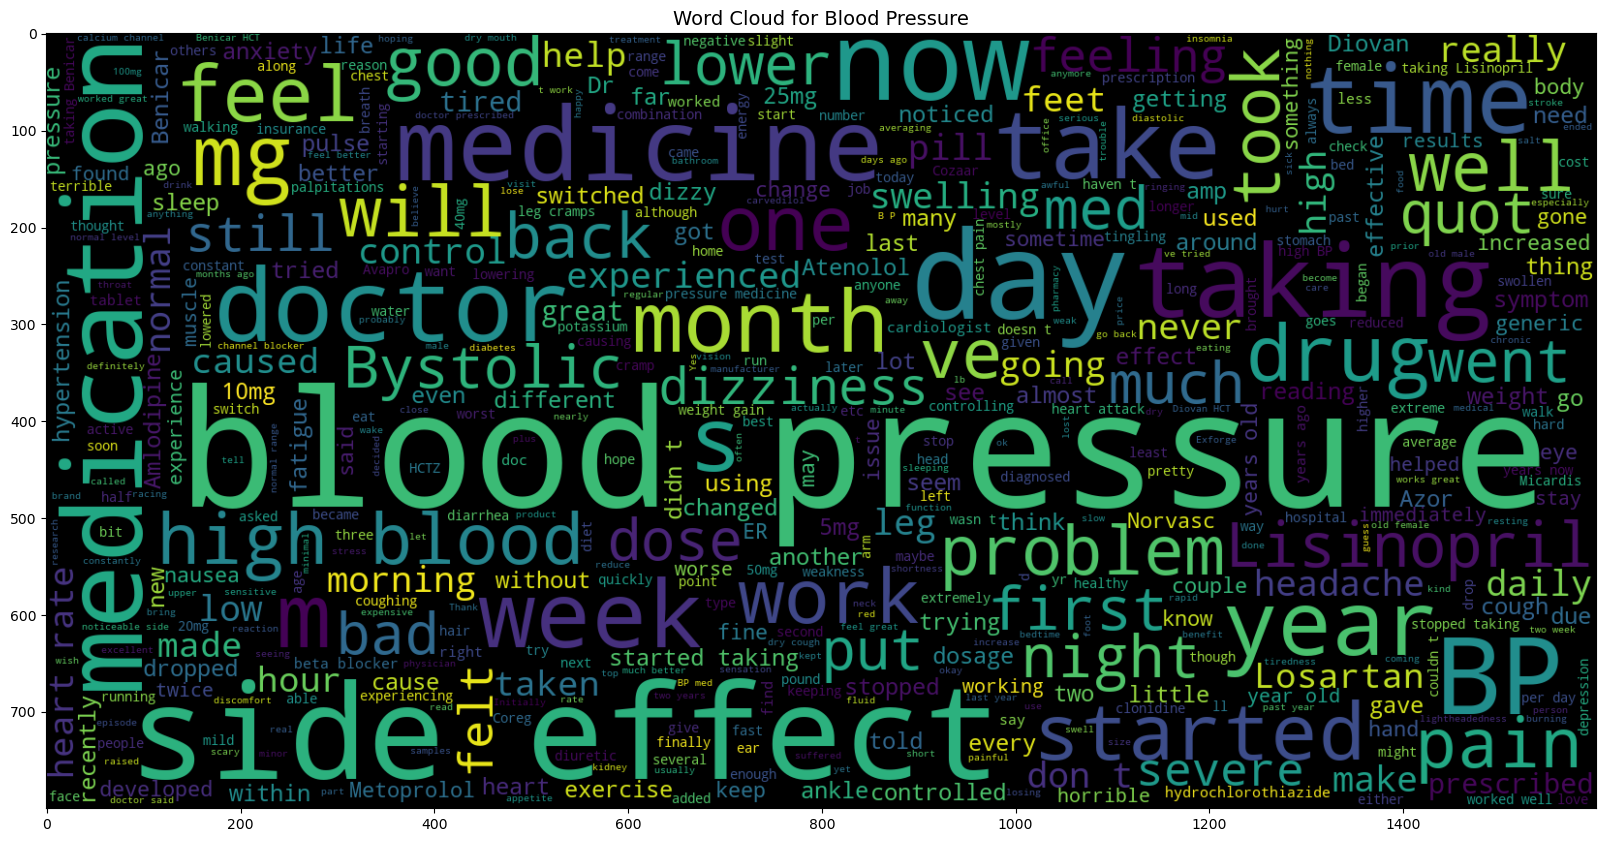

In [68]:
plt.figure(figsize= (20,20)) #Text that is Fake News Headlines
wc = WordCloud(max_words= 500, width = 1600, height = 800).generate(" ".join(X_bp.review))
plt.imshow(wc, interpolation='bilinear')
plt.title('Word Cloud for Blood Pressure', fontsize = 14)

Text(0.5, 1.0, 'Word Cloud for Diabetes Type 2')

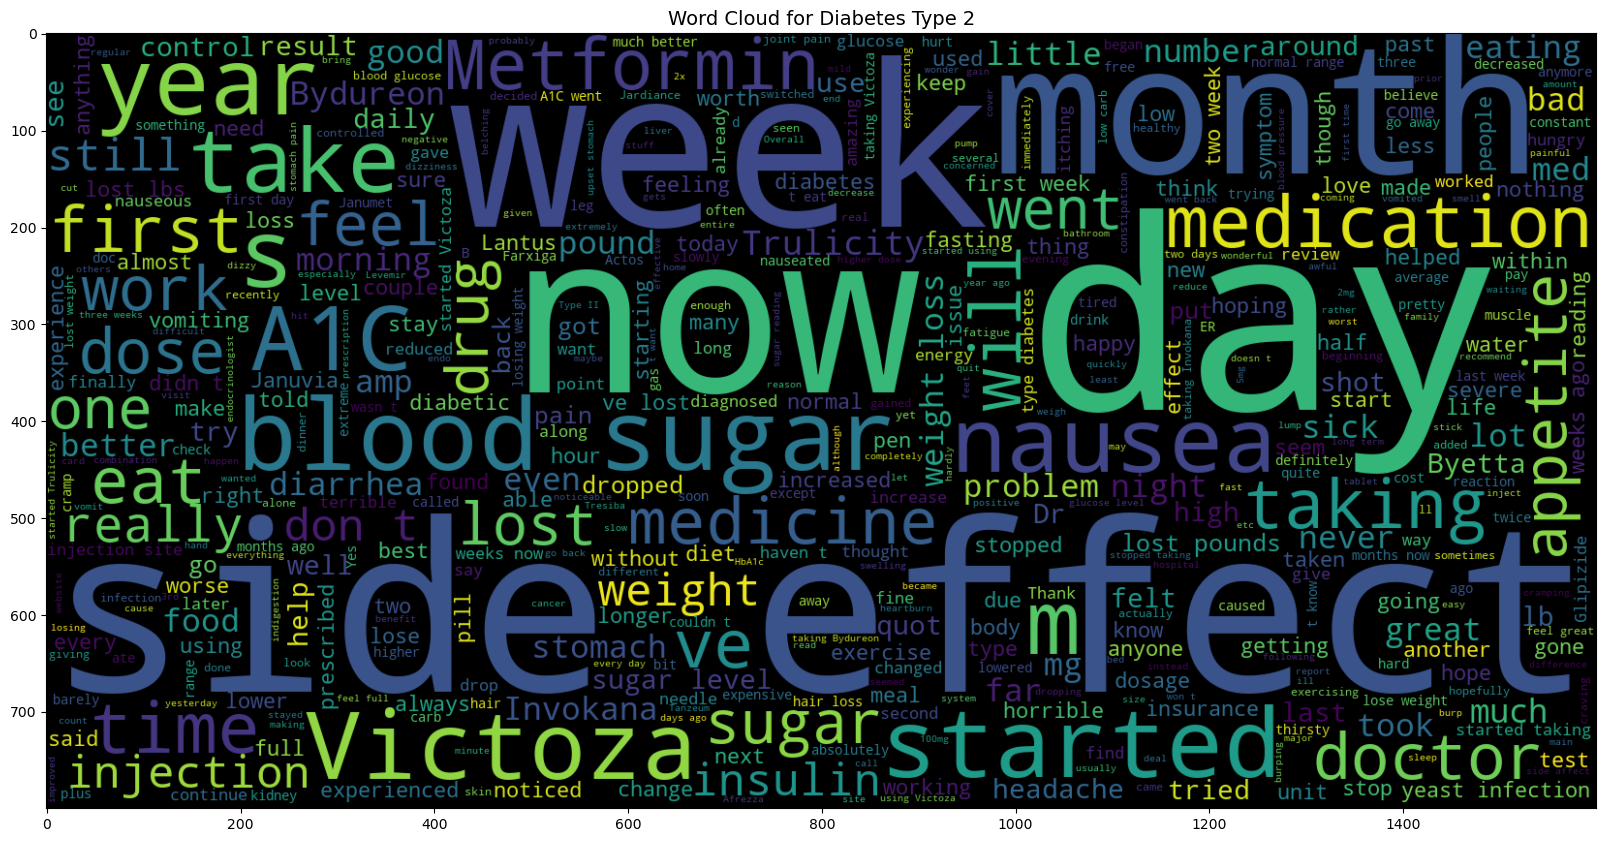

In [69]:
plt.figure(figsize= (20,20)) #Text that is Fake News Headlines
wc = WordCloud(max_words= 500, width = 1600, height = 800).generate(" ".join(X_db.review))
plt.imshow(wc, interpolation='bilinear')
plt.title('Word Cloud for Diabetes Type 2', fontsize = 14)

## Data preprocessing

In [70]:
for i, col in enumerate(X.columns): 
    X.iloc[:,i] = X.iloc[:,i].str.replace('"','')

In [71]:
pd.set_option('max_colwidth', None)
X.head()

condition  \
0      Depression   
4   Birth Control   
6   Birth Control   
9   Birth Control   
30  Birth Control   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      review  
0                                                                                                                                                                                                                                                                                                                                      I&#039;ve tried a few antidepressants over the years (citalopram, fluoxetine, amitriptyline), but none of those helped with my depression, insomnia &amp; anxiety. My doctor suggested and changed me onto 45mg mirtazapine and this medicine has saved my life. Thankfully I have had no side effects especially the most common - weight gain, I&#039;ve actually lost alot of weight. I still have suicidal thoughts but mirtazapine has saved me.  
4   I have been on this birth control for one cycle. After reading some of the reviews on this type and similar birth controls I was a bit apprehensive to start. Im giving this birth control a 9 out of 10 as I have not been on it long enough for a 10. So far I love this birth control! My side effects have been so minimal its like Im not even on birth control! I have experienced mild headaches here and there and some nausea but other than that ive been feeling great! I got my period on cue on the third day of the inactive pills and I had no idea it was coming because I had zero pms! My period was very light and I barely had any cramping! I had unprotected sex the first month and obviously didn&#039;t get pregnant so I&#039;m very pleased! Highly recommend  
6                                                                                                                                                I&#039;ve had the copper coil for about 3 months now. I was really excited at the thought of not taking hormones. I&#039;m good with pain however I nearly fainted with insertion, couldn&#039;t belive how painful it was; the doctor did say it is very painful for some. Well 3 months in, my periods last 11 days and I&#039;m in pain for about 15 days with random twangs especially in the left side and I&#039;m considering whether I want to put up with the intense pain and heavy periods. I&#039;d recommend this 100% to somebody who doesn&#039;t already have heavy painful periods but right now it just isn&#039;t for me  
9                                                                                                                                                                                                                                                                                                       I was on this pill for almost two years. It does work as far as not getting pregnant however my experience at first was it didn&#039;t make a huge difference then 6 or 7 months into it my sex drive went down, along with being very very dry, my moodiness increased drastically. I would cry one second and then get angry with my husband over anything and everything. My skin has gotten a lot worse, I broke out in places I never had in the last week. So now I am on Yaz.  
30                                            

In [72]:
## STOP WORDS ##

from nltk.corpus import stopwords

stop = stopwords.words('english')


In [73]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

## LEMMITIZATION ##

In [74]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

porter = PorterStemmer()

lemamtizer = WordNetLemmatizer()



In [75]:
print(porter.stem('sportingly'))
print(porter.stem('very'))
print(porter.stem('troubled'))

sportingli
veri
troubl


In [76]:
print(lemamtizer.lemmatize("sportingly"))
print(lemamtizer.lemmatize("very"))
print(lemamtizer.lemmatize("troubled"))

sportingly
very
troubled


In [77]:
from bs4 import BeautifulSoup
import re

In [78]:
def review_to_words(raw_review):
    #1.Delete HTMl
    review_text = BeautifulSoup(raw_review, "html.parser").get_text()
    #2. make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    #3. lower letters
    words = letters_only.lower().split()
    #4 Stopwords
    meaningful_words = [w for w in words if not w in stop]
    #5 Lemitization
    lemitize_words = [lemamtizer.lemmatize(w) for w in meaningful_words]
    #7 Space the joined words
    return( ' '.join(lemitize_words))

In [ ]:
X['review_clean'] = X['review'].apply(review_to_words)

In [80]:
X.head()

condition  \
0      Depression   
4   Birth Control   
6   Birth Control   
9   Birth Control   
30  Birth Control   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      review  \
0                                                                                                                                                                                                                                                                                                                                      I&#039;ve tried a few antidepressants over the years (citalopram, fluoxetine, amitriptyline), but none of those helped with my depression, insomnia &amp; anxiety. My doctor suggested and changed me onto 45mg mirtazapine and this medicine has saved my life. Thankfully I have had no side effects especially the most common - weight gain, I&#039;ve actually lost alot of weight. I still have suicidal thoughts but mirtazapine has saved me.   
4   I have been on this birth control for one cycle. After reading some of the reviews on this type and similar birth controls I was a bit apprehensive to start. Im giving this birth control a 9 out of 10 as I have not been on it long enough for a 10. So far I love this birth control! My side effects have been so minimal its like Im not even on birth control! I have experienced mild headaches here and there and some nausea but other than that ive been feeling great! I got my period on cue on the third day of the inactive pills and I had no idea it was coming because I had zero pms! My period was very light and I barely had any cramping! I had unprotected sex the first month and obviously didn&#039;t get pregnant so I&#039;m very pleased! Highly recommend   
6                                                                                                                                                I&#039;ve had the copper coil for about 3 months now. I was really excited at the thought of not taking hormones. I&#039;m good with pain however I nearly fainted with insertion, couldn&#039;t belive how painful it was; the doctor did say it is very painful for some. Well 3 months in, my periods last 11 days and I&#039;m in pain for about 15 days with random twangs especially in the left side and I&#039;m considering whether I want to put up with the intense pain and heavy periods. I&#039;d recommend this 100% to somebody who doesn&#039;t already have heavy painful periods but right now it just isn&#039;t for me   
9                                                                                                                                                                                                                                                                                                       I was on this pill for almost two years. It does work as far as not getting pregnant however my experience at first was it didn&#039;t make a huge difference then 6 or 7 months into it my sex drive went down, along with being very very dry, my moodiness increased drastically. I would cry one second and then get angry with my husband over anything and everything. My skin has gotten a lot worse, I broke out in places I never had in the last week. So now I am on Yaz.   
30                                       

In [81]:
X_feat = X['review_clean']
y=X['condition']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X_feat, y, stratify=y, test_size=0.2, random_state=0)

## Creating Features and Target Variables 

In [83]:
def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks,classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion matrix, without normalization")
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
            horizontalalignment ="center",
            color = "white" if cm[i,j] > thresh else "black")
    
    plt.tight_layout()
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
            

## Bag of Words

In [84]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

## Machine Learning Model

In [85]:
import sklearn.metrics as metrics

from sklearn.metrics import accuracy_score 


accuracy: 0.971
Confusion matrix, without normalization


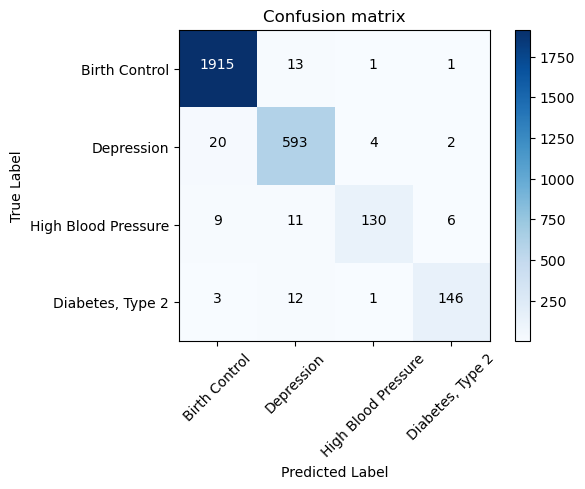

In [86]:
mnb = MultinomialNB()
mnb.fit(count_train, y_train)
pred = mnb.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy: %0.3f" % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','High Blood Pressure','Diabetes, Type 2'])
plot_confusion_matrix(cm,classes = ['Birth Control', 'Depression','High Blood Pressure','Diabetes, Type 2'])




## Passive Agressive Classifier

accuracy: 0.962
Confusion matrix, without normalization


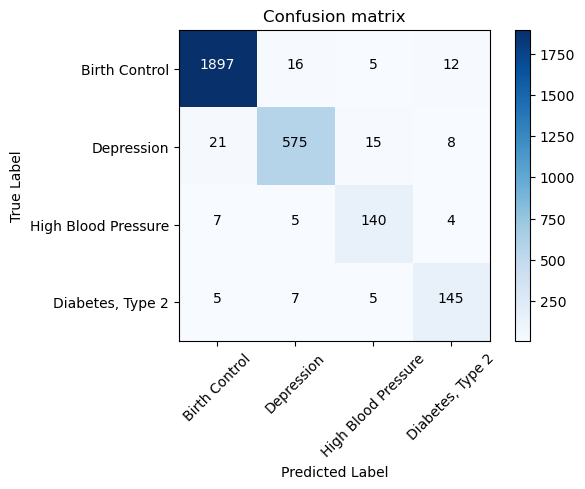

In [87]:
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression

passive = PassiveAggressiveClassifier()
passive.fit(count_train,y_train)
pred = passive.predict(count_test)
score = metrics.accuracy_score(y_test,pred)
print("accuracy: %0.3f" % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','High Blood Pressure','Diabetes, Type 2'])
plot_confusion_matrix(cm,classes = ['Birth Control', 'Depression','High Blood Pressure','Diabetes, Type 2'])


## TFIDF

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train_2 = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer.transform(X_test)

accuracy: 0.877
Confusion matrix, without normalization


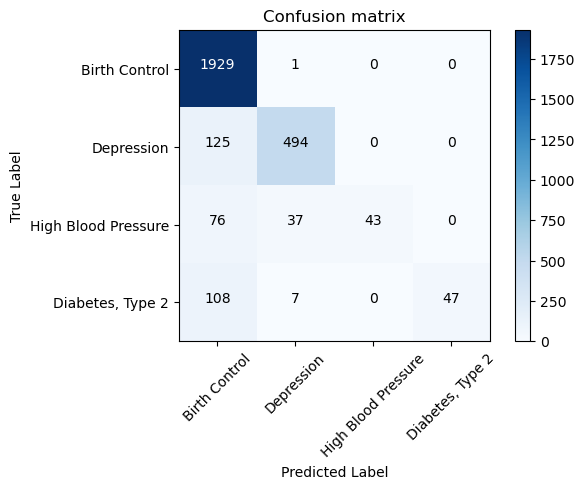

In [89]:
mnb_tf = MultinomialNB()
mnb_tf.fit(tfidf_train_2, y_train)
pred = mnb_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy: %0.3f" % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','High Blood Pressure','Diabetes, Type 2'])
plot_confusion_matrix(cm,classes = ['Birth Control', 'Depression','High Blood Pressure','Diabetes, Type 2'])


## Machine Learning Model TFIDF

accuracy: 0.877
Confusion matrix, without normalization


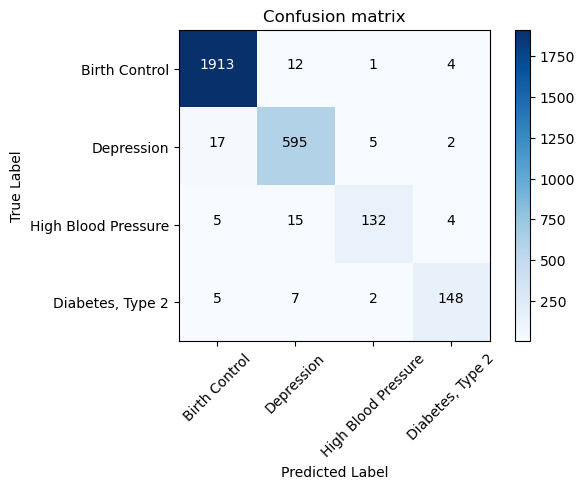

In [90]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english',max_df=0.8, ngram_range=(1,3))
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train, y_train)
pred = pass_tf.predict(tfidf_test)
print("accuracy: %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','High Blood Pressure','Diabetes, Type 2'])
plot_confusion_matrix(cm,classes = ['Birth Control', 'Depression','High Blood Pressure','Diabetes, Type 2'])


accuracy:   0.973
Confusion matrix, without normalization


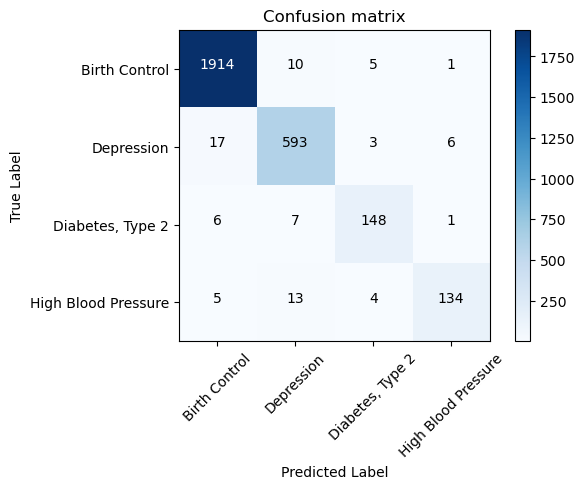

In [91]:
tfidf_vectorizer2 = TfidfVectorizer(stop_words='english',max_df=0.8, ngram_range=(1,2))
tfidf_train_2 = tfidf_vectorizer2.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer2.transform(X_test)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_2, y_train)
pred = pass_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])



## TFIDF : Trigrams

accuracy:   0.971
Confusion matrix, without normalization


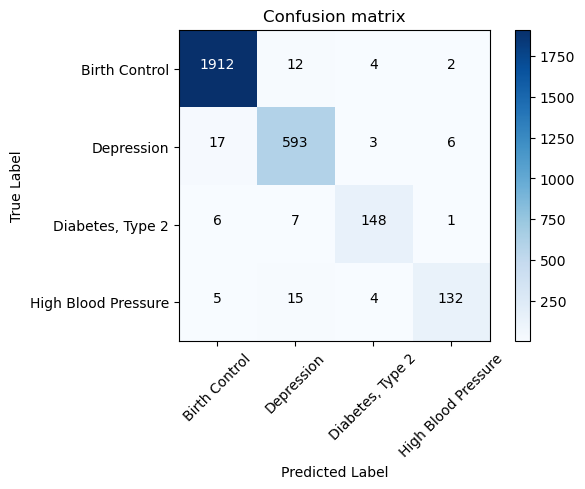

In [92]:
tfidf_vectorizer3 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,3))
tfidf_train_3 = tfidf_vectorizer3.fit_transform(X_train)
tfidf_test_3 = tfidf_vectorizer3.transform(X_test)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_3, y_train)
pred = pass_tf.predict(tfidf_test_3)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])


In [94]:
def most_informative_feature_for_class(vectorizer, classifier, classlabel, n=10):
    labelid = list(classifier.classes_).index(classlabel)
    feature_names = vectorizer.get_feature_names_out()
    topn = sorted(zip(classifier.coef_[labelid], feature_names))[-n:]
    
    for coef, feat in topn:
        print (classlabel, feat, coef)

most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'Birth Control')



Birth Control spotting 3.759637555481957
Birth Control cramp 3.7749240521741667
Birth Control pregnant 3.9139115500040194
Birth Control control 3.937650722516688
Birth Control bleeding 4.716408812674475
Birth Control acne 5.243270093650283
Birth Control birth control 5.339012470459976
Birth Control birth 5.548857817622165
Birth Control pill 7.213340791130047
Birth Control period 9.046319245155251


In [95]:
most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'Depression')


Depression antidepressant 3.961273522784076
Depression cymbalta 4.06404316662136
Depression effexor 4.102945231405606
Depression prozac 4.129134394961087
Depression zoloft 4.677005983307239
Depression lexapro 4.720732353277721
Depression mg 4.951891407607875
Depression wellbutrin 5.100819716351166
Depression pristiq 5.303353256398906
Depression depression 6.6608872182140875


In [96]:
most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'High Blood Pressure')


High Blood Pressure azor 2.1113933631467834
High Blood Pressure bystolic 2.248023453713862
High Blood Pressure losartan 2.3813334043335996
High Blood Pressure atenolol 2.446041117268707
High Blood Pressure cough 2.541155591141242
High Blood Pressure benicar 3.432328077670769
High Blood Pressure lisinopril 3.580412883626523
High Blood Pressure blood pressure 4.593866226460045
High Blood Pressure pressure 5.588424599220071
High Blood Pressure bp 7.351555790186439


In [98]:
most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'Diabetes, Type 2')


Diabetes, Type 2 bydureon 3.085680630857491
Diabetes, Type 2 injection 3.2673086612400253
Diabetes, Type 2 number 3.3364126691993237
Diabetes, Type 2 insulin 3.3761909878542786
Diabetes, Type 2 blood sugar 3.4728813716660394
Diabetes, Type 2 trulicity 3.5692509635522485
Diabetes, Type 2 invokana 3.821306819669686
Diabetes, Type 2 metformin 5.152314059711781
Diabetes, Type 2 victoza 5.914894954351449
Diabetes, Type 2 sugar 7.234462900613554


## Sample Predictions 

In [99]:
X.tail()

condition  \
53732     Depression   
53741  Birth Control   
53759  Birth Control   
53760  Birth Control   
53763  Birth Control   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           review  \
53732                                         I&#039;m a 19 year old girl and I&#039;ve been suffering from major depression and social anxiety for the past 5 years. I finally went to the doctors and was prescribed Lexapro 10mg. I&#039;ve been on it for 4 days now. I had side effects the first day I took it - nausea, slight headache, slight dizziness, sleepy and yawning a lot and most annoyingly INSOMNIA! I even felt a little confused at bedtime while trying to sleep. The side effects lasted for the first 3 days, now they&#039;re slowly going away. The first day I was really hyper and the next I was so tired but now it&#039;s starting to balance out and I can sleep better. I haven&#039;t had a depressing day since I&#039;ve been taking Lexapro so lets hope it stays that way.   
53741    I first would like to thank all of you that posted comments. After reading them, I felt I&#039;m not alone. It&#039;s not just happening to me, there is nothing wrong with me. I&#039;m 34, with one child and had Mirena for 5 months. The insertion was almost painless and the first month was fine. Right now, I have gained 10lbs, loss of sex drive, have headaches, back pain, insomnia, constipation, hair loss and general depression - OF COURSE that&#039;s going to cause to have mood swings. I&#039;m waiting on an appointment to have it removed. ANOTHER IMPORTANT ASPECT is that I had suffered from postpartum depression after the birth of my child 4 years ago and honestly I was worried that these side effects (especially  depression) were a sign that I was still not okay.   
53759                                                                    I was on Microgestin for about 3 years. Over the past year, I started to get extremely bad headaches during the sugar pill week. I took extra strength Tylenol the entire week, twice a day, and it still didn&#039;t make my headaches go away. I also would feel very lightheaded and nauseous. I had to leave work early, it was bad. The only good thing was I&#039;ve had the same box of tampons for the entire year. I barely had a period. Oh yeah, I also got high pigmentation right above my lips. They call it a &quot;pregnancy mask&quot; but you can get it with certain birth control. It is very dark and it is difficult to hide with makeup! I&#039;m not a big fan of having a weird skin mustache so I went off it.   
53760                                                                                                                                                                                                                                                                                                         I started taking Apri about 7 months ago. My breats got noticeably larger within the first few weeks and I gained about 10 pounds, but I&#039;m a thin girl anyway so I gladly take on the extra few pounds and curves. I got prescribed this birth control because of my ovarian cysts and since I have not had any problems with them. They&#039;ve been unnoticeable and my cramps don&#039;t even exist anymore. I l

In [100]:
text =["I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations."]
test = tfidf_vectorizer.transform(text)
pred1 = pass_tf.predict(test)[0]
pred1

'High Blood Pressure'

In [101]:
text =["or depression social anxiety past year finally went doctor prescribed lexapro mg day side effect first day took nausea slight headache slight dizziness sleepy yawning lot annoyingly insomnia even felt little confused bedtime trying sleep side effect lasted first day slowly going away fi"]
test = tfidf_vectorizer.transform(text)
pred1 = pass_tf.predict(test)[0]
pred1

'Depression'

In [102]:
text =["ined pound swelling hand foot retaining lot water thigh sugar level good doctor lowered dosage mg mg refused take get second opinion"]
test = tfidf_vectorizer.transform(text)
pred1 = pass_tf.predict(test)[0]
pred1

'Diabetes, Type 2'

In [103]:
text =["I have been on the Alesse birth control pills for 7 months now and before i started taking them, i experiecned irregular periods but since the pill, period is refularm occasional mood swings and high level of anxiety"]
test = tfidf_vectorizer.transform(text)
pred1 = pass_tf.predict(test)[0]
pred1

'Birth Control'

## Getting Top Three drugs

In [104]:
def top_drugs_extractor(condition):
    df_top = df[(df['rating']>=9)&(df['usefulCount']>=100)].sort_values(by = ['rating', 'usefulCount'], ascending = [False, False])
    drug_list = df_top[df_top['condition']==condition]['drugName'].head(3).tolist()
    return drug_list

In [105]:
def predict_text(list_text):
    df_test = pd.DataFrame(list_text, columns=['test sent'])
    df_test['test sent'] = df_test['test sent'].apply(review_to_words)
    tfidf_bigram = tfidf_vectorizer3.transform(list_text)
    prediction = pass_tf.predict(tfidf_bigram)
    df_test['prediction'] = prediction
    return df_test

In [106]:
sentences = [
    "I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations.",
    "This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am and changing asap.",
    "I just got diagnosed with type 2. My doctor prescribed Invokana and metformin from the beginning. My sugars went down to normal by the second week. I am losing so much weight. No side effects yet. Miracle medicine for me",
]

In [109]:
tfidf_trigram = tfidf_vectorizer3.transform(sentences)

predictions = pass_tf.predict(tfidf_trigram)

for text, label in zip(sentences,predictions):
    if label == 'High Blood Pressure':
        target = 'High Blood Pressure'
        top_drugs = top_drugs_extractor(label)
        print("text:" , text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
        
    elif label == 'Depression':
        target = 'Depression'
        top_drugs = top_drugs_extractor(label)
        print("text:" , text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
        
    elif label == 'Diabetes, Type 2':
        target = 'Diabetes, Type 2'
        top_drugs = top_drugs_extractor(label)
        print("text:" , text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
        
    else: 
        target = 'Birth Control'
        top_drugs = top_drugs_extractor(label)
        print("text:" , text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

text: I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations. 
Condition: High Blood Pressure
Top 3 Suggested Drugs:
Telmisartan
Amlodipine
Micardis

text: This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am and changing asap. 
Condition: Depression
Top 3 Suggested Drugs:
Sertraline
Cymbalta
Citalopram

text: I just got diagnosed with type 2. My doctor prescribed Invokana and metformin from the beginning. My sugars went down to normal by the second week. I am l